In [ ]:
Insurance Cost Analysis

In [ ]:
Load the data as a pandas dataframe
Clean the data, taking care of the blank entries
Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
Develop single variable and multi variable Linear Regression models for predicting the charges
Use Ridge regression to refine the performance of Linear regression models.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath, header=None)

In [5]:
#df = pd.read_csv(path, header=None)
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


In [6]:
#Adding header to dataframe
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
print(df.columns)
print(df)

Index(['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region',
       'charges'],
      dtype='object')
     age  gender     bmi  no_of_children smoker  region      charges
0     19       1  27.900               0      1       3  16884.92400
1     18       2  33.770               1      0       4   1725.55230
2     28       2  33.000               3      0       4   4449.46200
3     33       2  22.705               0      0       1  21984.47061
4     32       2  28.880               0      0       1   3866.85520
...   ..     ...     ...             ...    ...     ...          ...
2767  47       1  45.320               1      0       4   8569.86180
2768  21       1  34.600               0      0       3   2020.17700
2769  19       2  26.030               1      1       1  16450.89470
2770  23       2  18.715               0      0       1  21595.38229
2771  54       2  31.600               0      0       3   9850.43200

[2772 rows x 7 columns]


In [7]:
# replace the '?' entries with 'NaN' values.
df.replace('?', np.nan, inplace = True)

In [9]:
#Identifying columns with Null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [10]:
#Handling Missing values
#For Continues attributes like "Age" replacing missing values with Mean
#For Categorical attributes like smoke replacing missing values with the most frequent value


#Categorical attribute
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

#Continuous variable 
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

#Update data types
df[["age", "smoker"]] = df [["age", "smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


In [11]:
#Rounding to nearest 2 Decimal places
df[["charges"]] = np.round(df[["charges"]], 2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


In [12]:
Exploratory Data Analysis (EDA)


(0.0, 66902.85800000001)

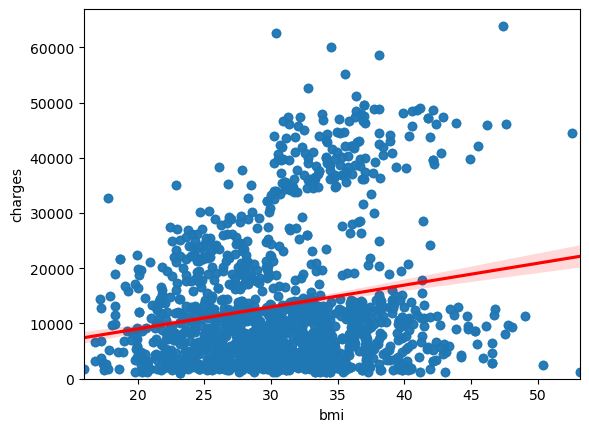

In [14]:
#Regression plots Charges VS BMI

sns.regplot(x = "bmi", y = "charges", data = df, line_kws={"color": "red"})
plt.ylim(0,)   

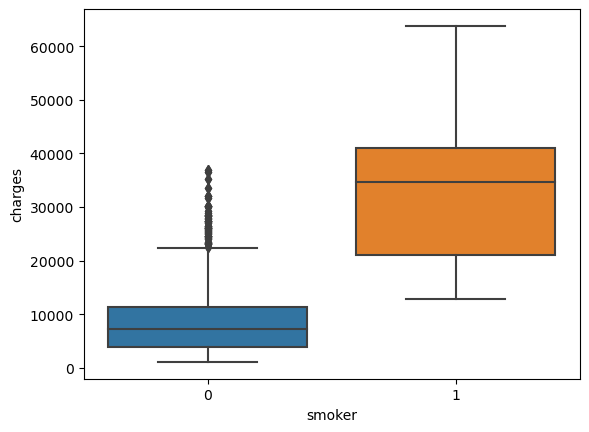

In [15]:
#Box plot charges vs Smoker

sns.boxplot(x="smoker", y="charges", data=df)

In [16]:
Print the correlation matrix for the dataset.

In [17]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


In [18]:
#Model Development
Fitting a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. 
Printing the  𝑅2  score of this model.

In [19]:
X = df[['smoker']]
Y = df[['charges']]
lm = LinearRegression()
lm.fit(X, Y)
print(lm.score(X, Y))

0.6221791733924185


In [31]:
#Fitting linear Regression model
#Definition of Y and Lm remain same as used
Z = df[["age", "gender","bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z, Y)
print(lm.score(Z, Y))

0.7504083820289634


In [32]:
Creating a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() 
to create a model that can predict the charges value.

In [33]:
#Creating training Pipeline. Y and Z remain the same values
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',
                                                                                               LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)
print(r2_score(Y, ypipe))

0.8452574046807049
